In [1]:
import requests as re
import pandas as pd
import src.API_functions as api
import seaborn as sns

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS
from langdetect import detect
from textblob import TextBlob

import sqlalchemy as alch
from getpass import getpass
import src.cleaning_functions as cleafun

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("paper")
sns.set(rc={"figure.figsize": (10.,6.)})
sns.set_style("whitegrid")

# 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

### First of all, we are going to choose a random tweet from our database using an API query

In [2]:
api.get_random_()

compound                                               -0.296
tweet       If you believe in an afterlife, right now Quee...
username                                        wojtekwarbear
Name: 92465, dtype: object

### We are going to check the compound for some of the members of the Royal Family.

In [3]:
df = api.compound_by_name("Harry")
df["Megan"]= api.compound_by_name("Megan")
df["William"]= api.compound_by_name("William")
df["Kate"]= api.compound_by_name("Kate")
df["Queen"]= api.compound_by_name("Queen")
df["King"]= api.compound_by_name("King")
df["Charles"]= api.compound_by_name("Charles")
df["Republic"]= api.compound_by_name("Republic")
df

,Harry,Megan,William,Kate,Queen,King,Charles,Republic
0,-0.063,-0.059,0.045,0.025,0.044,0.047,-0.015,0.128


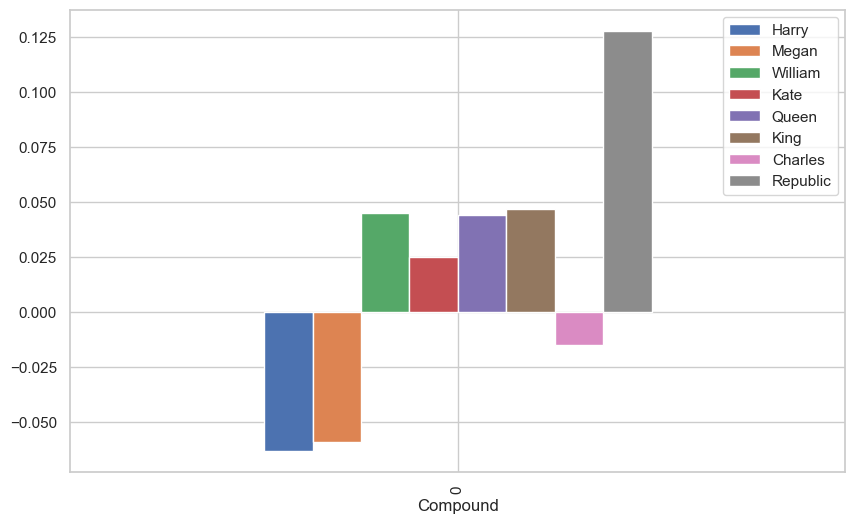

In [11]:
df.plot(y = ["Harry", "Megan", "William", "Kate", "Queen", "King", "Charles", "Republic"], kind = "bar", xlabel= "Compound");
plt.savefig('data/name.png')

### We are going to visualizate the top ten tweets for number of retweets, likes and replies.

In [5]:
api.get_top_tweets("retweets_count")

,name,retweets_count,tweet,compound
0,President Biden,16910,Our statement on the death of Queen Elizabeth ...,-0.5994
1,Mick Jagger,16584,"For my whole life Her Majesty, Queen Elizabeth...",0.8020
2,Liz Truss,11397,Her Majesty Queen Elizabeth II https://t.co/A...,0.0000
3,Empire State Building,9269,"Tonight, our tower lights will shine in purple...",0.7184
4,Paul McCartney,9198,God bless Queen Elizabeth II May she rest in ...,0.8126
5,CSGOEmpire,7785,In memory of Queen Elizabeth IIs passing A giv...,0.3612
6,Liverpool FC,6608,Liverpool Football Club is saddened by the pas...,0.0000
7,BBC News Africa,6476,We take a look back at Queen Elizabeth IIs lon...,0.0000
8,Oceanboy,4501,แปลมม: ในทสดชายชราอาย 73 ไดงานทำแลว #QueenEl...,0.0000
9,NASA,4026,Queen Elizabeth IIs reign spanned all of space...,0.2960


In [6]:
api.get_top_tweets("likes_count")

,likes_count,name,tweet,compound
0,151799,Mick Jagger,"For my whole life Her Majesty, Queen Elizabeth...",0.8020
1,123320,President Biden,Our statement on the death of Queen Elizabeth ...,-0.5994
2,85579,Empire State Building,"Tonight, our tower lights will shine in purple...",0.7184
3,69313,Liz Truss,Her Majesty Queen Elizabeth II https://t.co/A...,0.0000
4,66895,Paul McCartney,God bless Queen Elizabeth II May she rest in ...,0.8126
5,54577,Lakota Man,Despite the colonial injustices perpetrated by...,0.8442
6,47805,Liverpool FC,Liverpool Football Club is saddened by the pas...,0.0000
7,47661,Marcus Rashford MBE,"Rest in peace, Queen Elizabeth II https://t....",0.5423
8,38603,Rockstar Games,"Rest In Peace, Queen Elizabeth II, a global le...",0.7430
9,36386,La tour Eiffel,"In tribute to Her Majesty Queen Elizabeth II, ...",0.0000


In [7]:
api.get_top_tweets("replies_count")

,name,replies_count,tweet,compound
0,Brigitte Gabriel,8102,President Trump and Queen Elizabeth II were ve...,-0.1832
1,Adam Bandt,4756,Rest In Peace Queen Elizabeth II. Our thought...,0.8126
2,President Biden,3714,Our statement on the death of Queen Elizabeth ...,-0.5994
3,Kimberly Guilfoyle,2810,70-year reign. 14 U.S. presidents. 1 extraor...,0.7184
4,Liz Truss,2273,Her Majesty Queen Elizabeth II https://t.co/A...,0.0000
5,Cyril Ramaphosa,1726,I met Her Majesty Queen Elizabeth II at the la...,0.8439
6,Lakota Man,1678,Despite the colonial injustices perpetrated by...,0.8442
7,Adamu Garba II,1608,"If Im the President of Nigeria today, Ill decl...",-0.8625
8,Rockstar Games,1501,"Rest In Peace, Queen Elizabeth II, a global le...",0.7430
9,Ian Rapoport,1415,"Before tonights #Rams-#Bills game, the NFL wil...",0.0000


### Next, we are going to check for the tweets with the highest positive rate

In [8]:
api.get_pos(0.825)

,pos,tweet,username
0,0.905,Lovely. Thanks for sharing. #QueenElizabethII,newsjunkiejo
1,0.881,God bless and thank you #QueenElizabethII,matt2knight
2,0.878,Positively delightful #QueenElizabethII,briangovatos
3,0.875,True Love #QueenElizabethII,flippingvalve
4,0.865,@_teekay7 well she can sure dream,ministryofkpop
5,0.858,THANK GOD #QueenElizabethII,rockinmargiela
6,0.857,@roun_sa_ville yw dearie,kittykatarquis
7,0.851,"Grace, honour, loyalty and love of countryNobo...",jasonbryantj
8,0.846,@ashwillrant help me too lol,badbitch3ra
9,0.843,I truly hope God saved the Queen #QueenElizabe...,knoxbroadcast


### ...and my favourites; with the most negative rate

In [9]:
api.get_neg(0.800)

,neg,tweet,username
0,1.000,in hell,ellzabethqueen
1,1.000,she died,lizzieupdatess
2,1.000,they are lying,l8ufs
3,1.000,weapon,scousesquatch
4,0.907,FUCK THIS DAMN SHIT.,koribaudelaire
5,0.881,Bitch died #QueenElizabethII,evilankit
6,0.881,Wtf this shit mean,itshotdownhere0
7,0.875,@MoistCr1TiKaL hell has all the bad bitches i ...,toonymf
8,0.875,Damn Im dead,queenelthe2
9,0.867,Damn he on the floor wtf,itshotdownhere0


# POST

In [10]:
my_params= {'name': 'random one',
            'tweet': 'This is a test',
            'compound': '0.001'}

url = 'http://127.0.0.1:9000/insertweet'
res = re.post(url, params = my_params)
res

<Response [200]>